In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec

pd.plotting.register_matplotlib_converters()

[*********************100%***********************]  1 of 1 completed


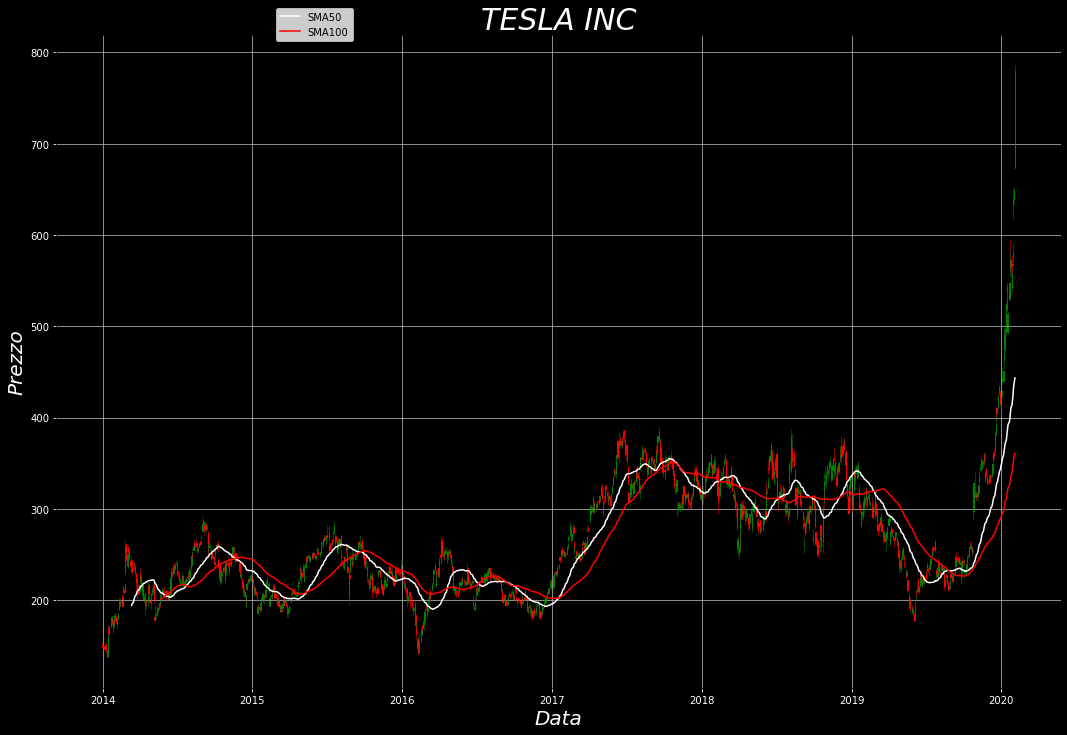

In [2]:
simbolo='TSLA'
nome='TESLA INC'
inizio=date(2014,1,1)
fine=date.today()
data=yf.download(simbolo,inizio,fine)
df=pd.DataFrame(data)
df.head()
df.reset_index(inplace=True)
df['Date'] = df['Date'].map(mdates.date2num)
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(111)
ax1.set_title(nome,size=30, color='white',style='italic')
ax1.set_facecolor('black')
ax1.figure.set_facecolor('black')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.xaxis_date()
candlestick_ohlc(ax1, df.values, width=0.6, colorup='green', colordown='red', alpha=1)
ax1.grid()
df['SMA50'] = df['Close'].rolling(50).mean()
df['SMA100'] = df['Close'].rolling(100).mean()
ax1.plot(df['Date'], df['SMA50'], color='white', label='SMA50')
ax1.plot(df['Date'], df['SMA100'], color='red', label='SMA100')
plt.xlabel('Data',size=20, color='white',style='italic')
plt.ylabel('Prezzo',size=20, color='white',style='italic')
plt.legend(bbox_to_anchor=(0.3, 1.05))
plt.show()

In [3]:
data=yf.download(simbolo,inizio,fine)
df=pd.DataFrame(data)
ritorno_giornaliero = df['Close'].pct_change()
ritorno_giornaliero.head()

[*********************100%***********************]  1 of 1 completed


Date
2013-12-31         NaN
2014-01-02   -0.002194
2014-01-03   -0.003598
2014-01-06   -0.017117
2014-01-07    0.016054
Name: Close, dtype: float64

In [4]:
ritorno_giornaliero.describe()

count    1532.000000
mean        0.001500
std         0.029304
min        -0.139015
25%        -0.013000
50%         0.000545
75%         0.016516
max         0.198949
Name: Close, dtype: float64

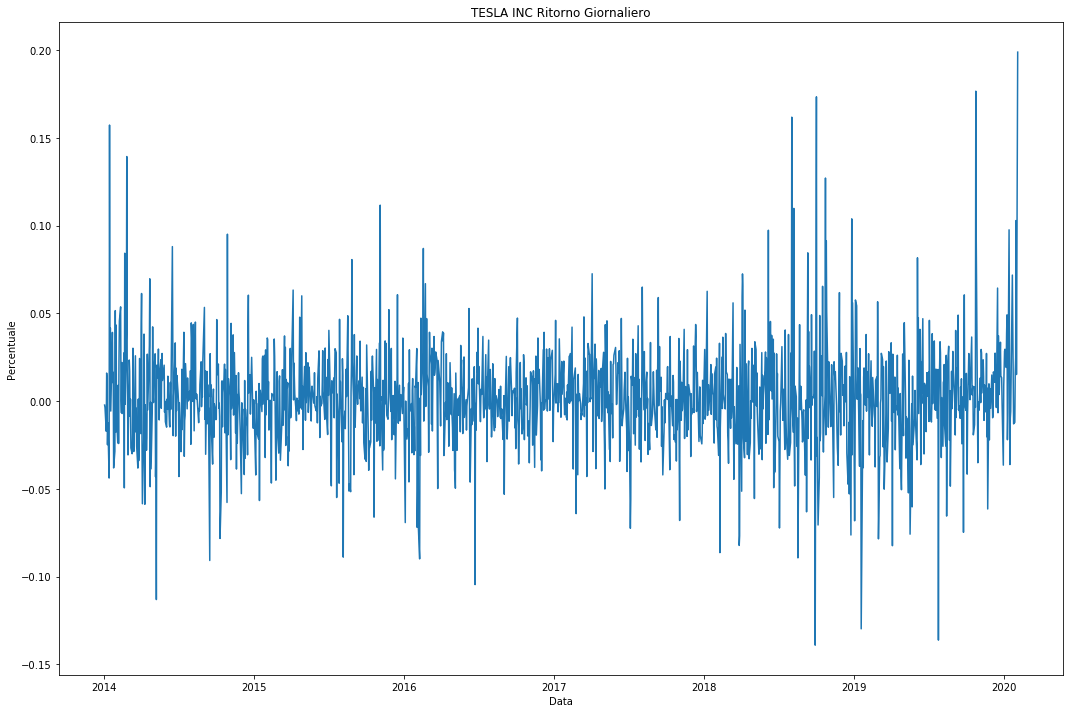

In [5]:
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(111)
ax1.plot(ritorno_giornaliero)
ax1.set_xlabel("Data")
ax1.set_ylabel("Percentuale")
ax1.set_title("{} Ritorno Giornaliero".format(nome))
plt.show()

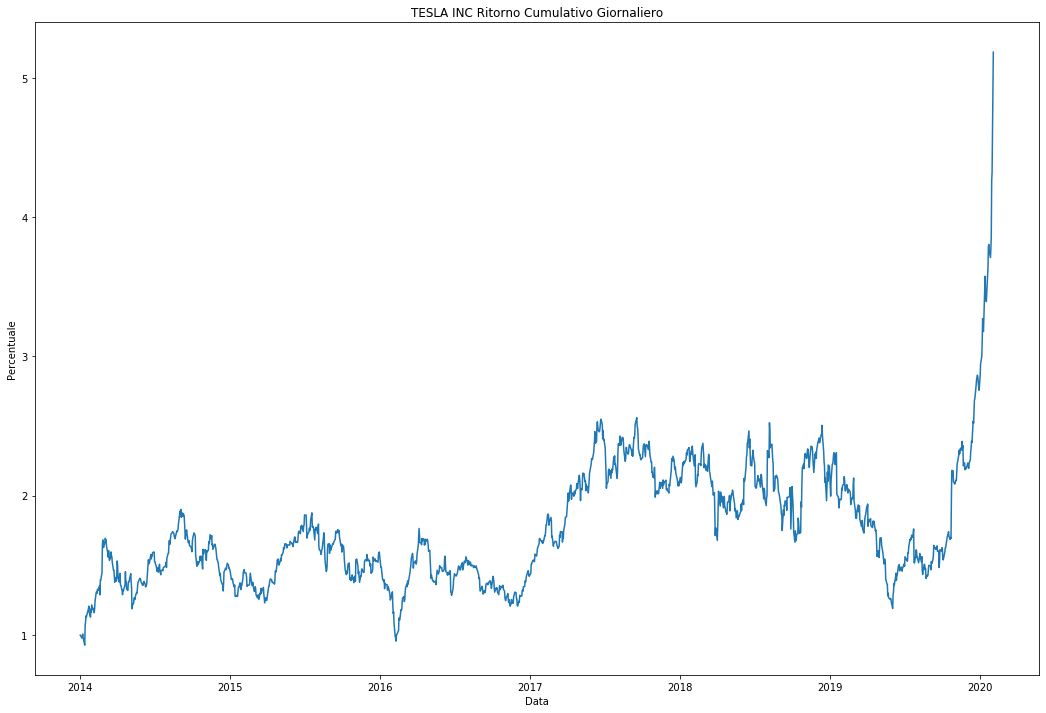

In [6]:
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(111)
ax1.plot((ritorno_giornaliero + 1).cumprod())
ax1.set_xlabel("Data")
ax1.set_ylabel("Percentuale")
ax1.set_title("{} Ritorno Cumulativo Giornaliero".format(nome))
plt.show()

In [7]:
data=yf.download(simbolo,inizio,fine)
df=pd.DataFrame(data)
ritorno_giornaliero = df['Close'].pct_change()
ret_dat=pd.DataFrame(ritorno_giornaliero)
ret_dat.reset_index(level=0, inplace=True)
ret_dat['nday'] =ret_dat['Date'].dt.weekday_name
ret_dat.head()

[*********************100%***********************]  1 of 1 completed


,Date,Close,nday
0,2013-12-31,NaN,Tuesday
1,2014-01-02,-0.002194,Thursday
2,2014-01-03,-0.003598,Friday
3,2014-01-06,-0.017117,Monday
4,2014-01-07,0.016054,Tuesday


<Figure size 1296x864 with 0 Axes>

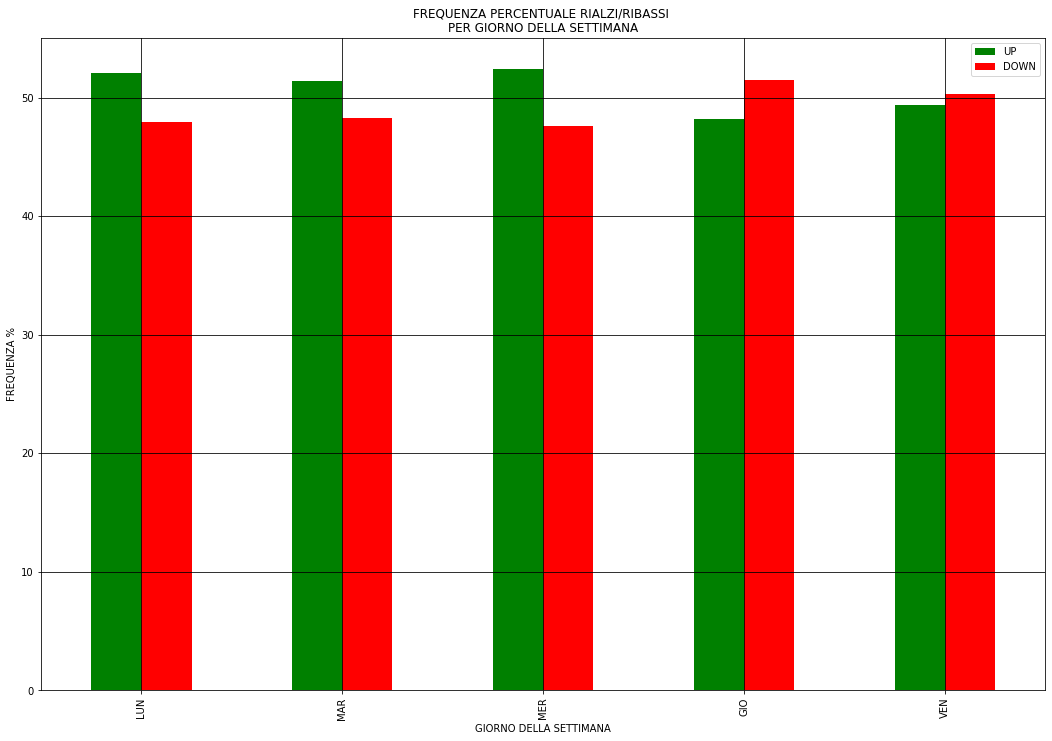

In [8]:
lunpos=len(ret_dat[(ret_dat['nday']=='Monday') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='Monday'])*100
lunneg=len(ret_dat[(ret_dat['nday']=='Monday') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='Monday'])*100
marpos=len(ret_dat[(ret_dat['nday']=='Tuesday') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='Tuesday'])*100
marneg=len(ret_dat[(ret_dat['nday']=='Tuesday') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='Tuesday'])*100
merpos=len(ret_dat[(ret_dat['nday']=='Wednesday') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='Wednesday'])*100
merneg=len(ret_dat[(ret_dat['nday']=='Wednesday') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='Wednesday'])*100
giopos=len(ret_dat[(ret_dat['nday']=='Thursday') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='Thursday'])*100
gioneg=len(ret_dat[(ret_dat['nday']=='Thursday') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='Thursday'])*100
venpos=len(ret_dat[(ret_dat['nday']=='Friday') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='Friday'])*100
venneg=len(ret_dat[(ret_dat['nday']=='Friday') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='Friday'])*100        

dataday = {'GIORNO DELLA SETTIMANA': ['LUN','MAR','MER','GIO','VEN'], 
         'UP': [lunpos,marpos,merpos,giopos,venpos],
         'DOWN': [lunneg,marneg,merneg,gioneg,venneg]}
dfday=pd.DataFrame(dataday)
fig = plt.figure(figsize=(18, 12))
dfday.plot(x="GIORNO DELLA SETTIMANA", y=["UP", "DOWN"], 
                  kind="bar",color=["Green","Red"],
                  title='FREQUENZA PERCENTUALE RIALZI/RIBASSI \nPER GIORNO DELLA SETTIMANA',figsize=(18, 12))
plt.grid(color='black')
plt.ylabel('FREQUENZA %')
plt.xlabel('GIORNO DELLA SETTIMANA')
plt.legend(loc='upper right')
plt.show()

In [9]:
data=yf.download(simbolo,inizio,fine)
df=pd.DataFrame(data)
ritorno_mensile = df['Close'].resample('M').ffill().pct_change()
ritorno_mensile.head()

[*********************100%***********************]  1 of 1 completed


Date
2013-12-31         NaN
2014-01-31    0.205943
2014-02-28    0.349485
2014-03-31   -0.148523
2014-04-30   -0.002686
Freq: M, Name: Close, dtype: float64

In [10]:
ritorno_mensile.describe()

count    74.000000
mean      0.031573
std       0.141219
min      -0.224266
25%      -0.067863
50%       0.001620
75%       0.111930
max       0.555160
Name: Close, dtype: float64

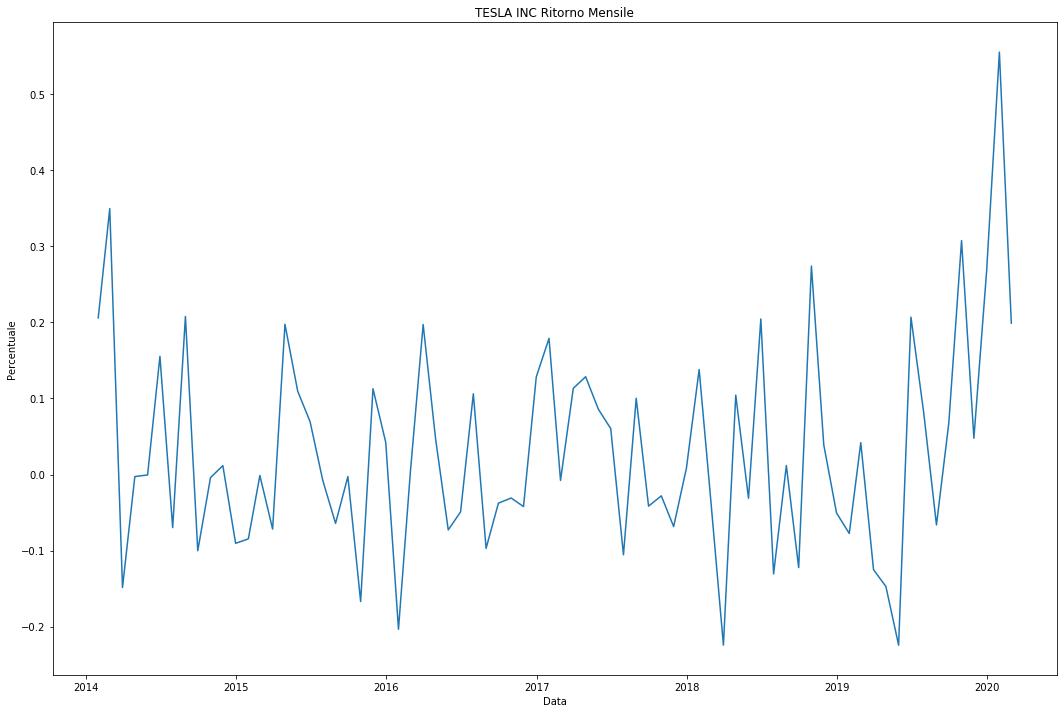

In [11]:
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(111)
ax1.plot(ritorno_mensile)
ax1.set_xlabel("Data")
ax1.set_ylabel("Percentuale")
ax1.set_title("{} Ritorno Mensile".format(nome))
plt.show()

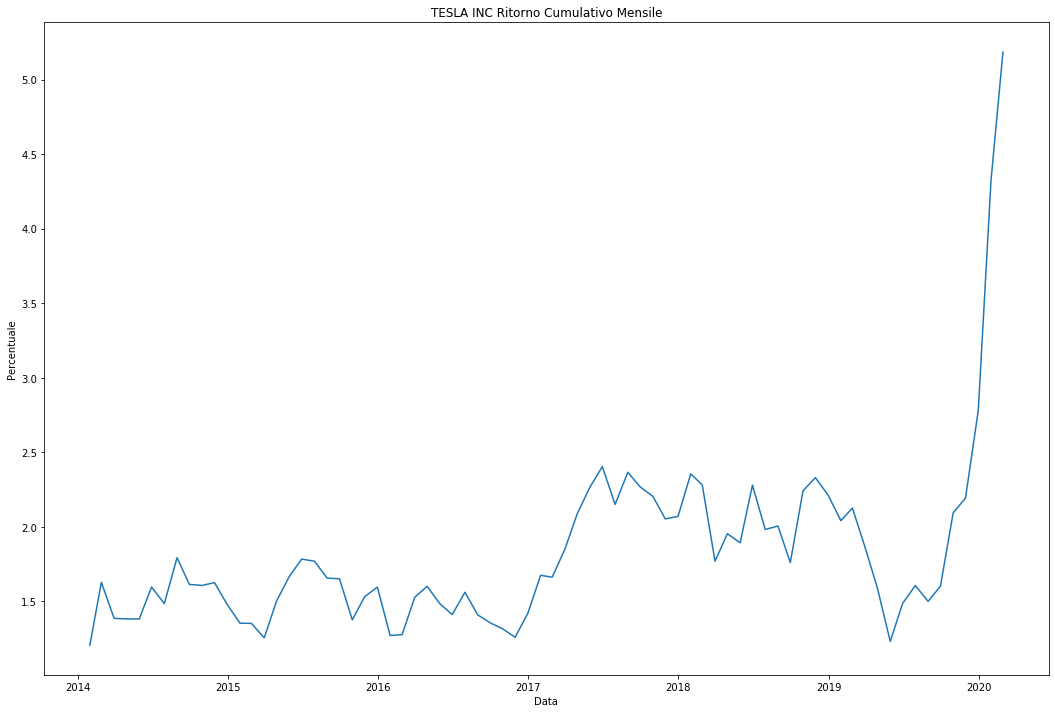

In [12]:
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(111)
ax1.plot((ritorno_mensile + 1).cumprod())
ax1.set_xlabel("Data")
ax1.set_ylabel("Percentuale")
ax1.set_title("{} Ritorno Cumulativo Mensile".format(nome))
plt.show()

In [13]:
data=yf.download(simbolo,inizio,fine)
df=pd.DataFrame(data)
ritorno_mensile = df['Close'].resample('M').ffill().pct_change()
ret_dat=pd.DataFrame(ritorno_mensile)
ret_dat.reset_index(level=0, inplace=True)
ret_dat['nday'] =ret_dat['Date'].dt.month_name()
ret_dat.head()

[*********************100%***********************]  1 of 1 completed


,Date,Close,nday
0,2013-12-31,NaN,December
1,2014-01-31,0.205943,January
2,2014-02-28,0.349485,February
3,2014-03-31,-0.148523,March
4,2014-04-30,-0.002686,April


In [14]:
genpos=len(ret_dat[(ret_dat['nday']=='January') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='January'])*100
genneg=len(ret_dat[(ret_dat['nday']=='January') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='January'])*100
febpos=len(ret_dat[(ret_dat['nday']=='February') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='February'])*100
febneg=len(ret_dat[(ret_dat['nday']=='February') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='February'])*100
marpos=len(ret_dat[(ret_dat['nday']=='March') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='March'])*100
marneg=len(ret_dat[(ret_dat['nday']=='March') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='March'])*100
aprpos=len(ret_dat[(ret_dat['nday']=='April') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='April'])*100
aprneg=len(ret_dat[(ret_dat['nday']=='April') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='April'])*100
magpos=len(ret_dat[(ret_dat['nday']=='May') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='May'])*100
magneg=len(ret_dat[(ret_dat['nday']=='May') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='May'])*100  
giupos=len(ret_dat[(ret_dat['nday']=='June') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='June'])*100
giuneg=len(ret_dat[(ret_dat['nday']=='June') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='June'])*100
lugpos=len(ret_dat[(ret_dat['nday']=='July') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='July'])*100
lugneg=len(ret_dat[(ret_dat['nday']=='July') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='July'])*100
agopos=len(ret_dat[(ret_dat['nday']=='August') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='August'])*100
agoneg=len(ret_dat[(ret_dat['nday']=='August') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='August'])*100
settpos=len(ret_dat[(ret_dat['nday']=='September') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='September'])*100
settneg=len(ret_dat[(ret_dat['nday']=='September') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='September'])*100
ottpos=len(ret_dat[(ret_dat['nday']=='October') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='October'])*100
ottneg=len(ret_dat[(ret_dat['nday']=='October') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='October'])*100
novpos=len(ret_dat[(ret_dat['nday']=='November') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='November'])*100
novneg=len(ret_dat[(ret_dat['nday']=='November') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='November'])*100
dicpos=len(ret_dat[(ret_dat['nday']=='December') & 
                                         (ret_dat['Close']>0)])/len(ret_dat[ret_dat['nday']=='December'])*100
dicneg=len(ret_dat[(ret_dat['nday']=='December') & 
                                         (ret_dat['Close']<0)])/len(ret_dat[ret_dat['nday']=='December'])*100
            
        

<Figure size 1296x864 with 0 Axes>

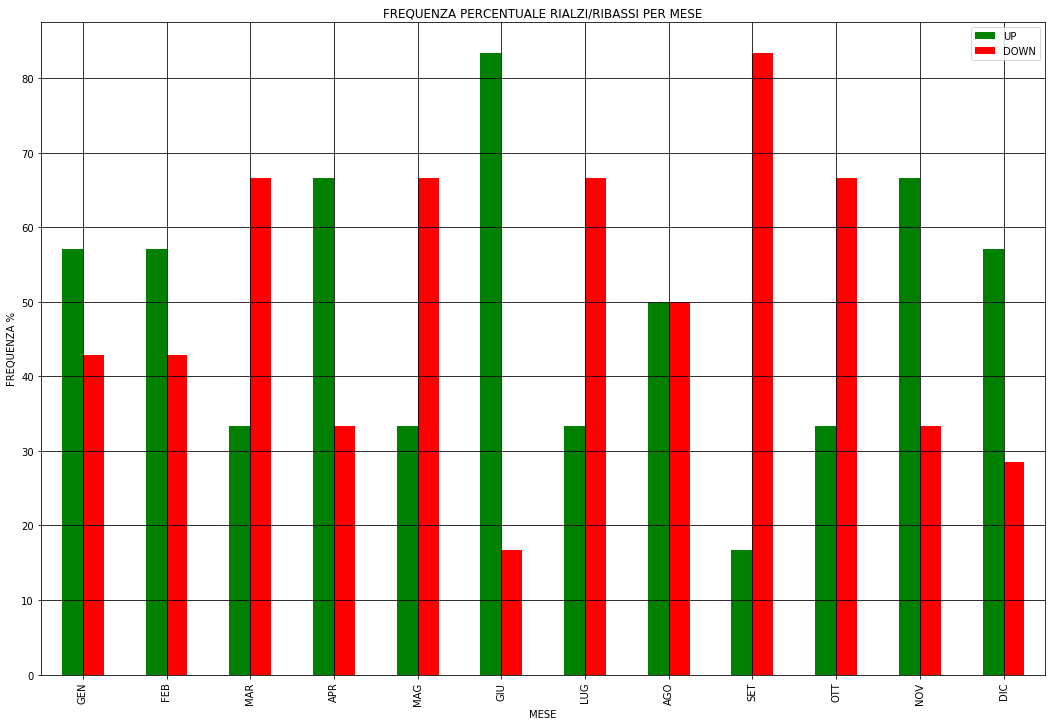

In [15]:
datamonth = {'MESI': ['GEN','FEB','MAR','APR','MAG','GIU','LUG','AGO','SET','OTT','NOV','DIC'], 
         'UP': [genpos,febpos,marpos,aprpos,magpos,giupos,lugpos,agopos,settpos,ottpos,novpos,dicpos],
         'DOWN': [genneg,febneg,marneg,aprneg,magneg,giuneg,lugneg,agoneg,settneg,ottneg,novneg,dicneg]}
dfmonth=pd.DataFrame(datamonth)
plt.figure(figsize=(18, 12))  
dfmonth.plot(x="MESI", y=["UP", "DOWN"], 
                  kind="bar",color=["Green","Red"],
                  title='FREQUENZA PERCENTUALE RIALZI/RIBASSI PER MESE',figsize=(18, 12))
plt.grid(color='black')
plt.ylabel('FREQUENZA %')
plt.xlabel('MESE')
plt.legend(loc='upper right')
plt.show()

In [16]:
ritorno_annuale = df['Close'].resample('Y').ffill().pct_change()
ritorno_annuale.head()

Date
2013-12-31         NaN
2014-12-31    0.478495
2015-12-31    0.079133
2016-12-31   -0.109662
2017-12-31    0.457017
Freq: A-DEC, Name: Close, dtype: float64

In [17]:
ritorno_annuale.describe()

count    7.000000
mean     0.299348
std      0.328405
min     -0.109662
25%      0.074013
50%      0.257001
75%      0.467756
max      0.864557
Name: Close, dtype: float64

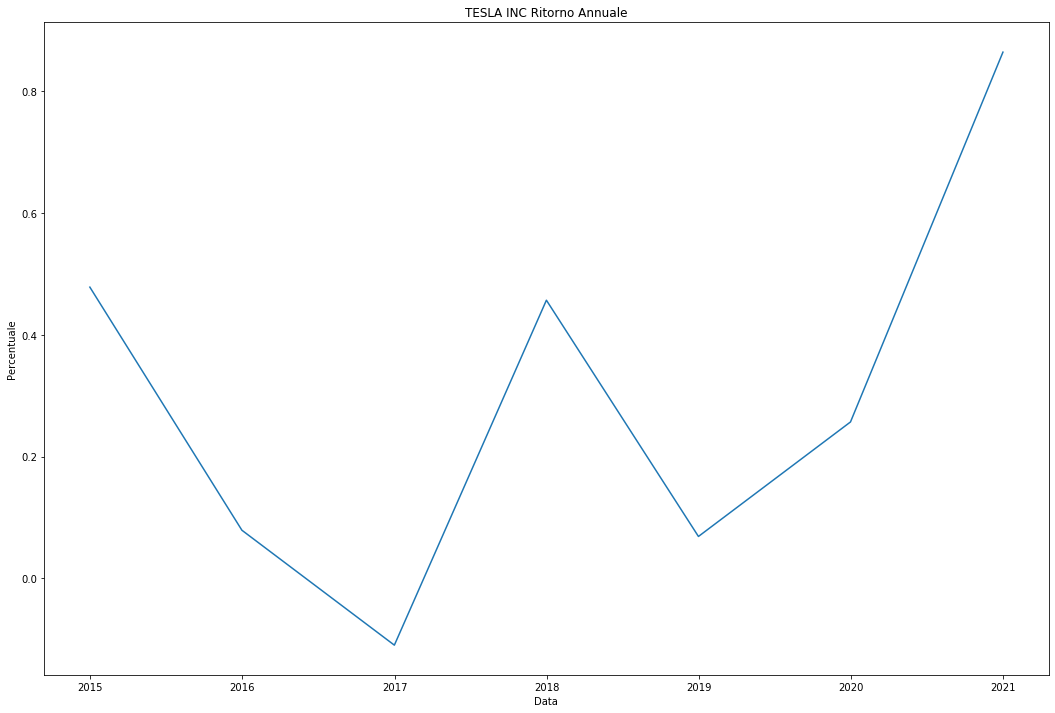

In [18]:
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(111)
ax1.plot(ritorno_annuale)
ax1.set_xlabel("Data")
ax1.set_ylabel("Percentuale")
ax1.set_title("{} Ritorno Annuale".format(nome))
plt.show()

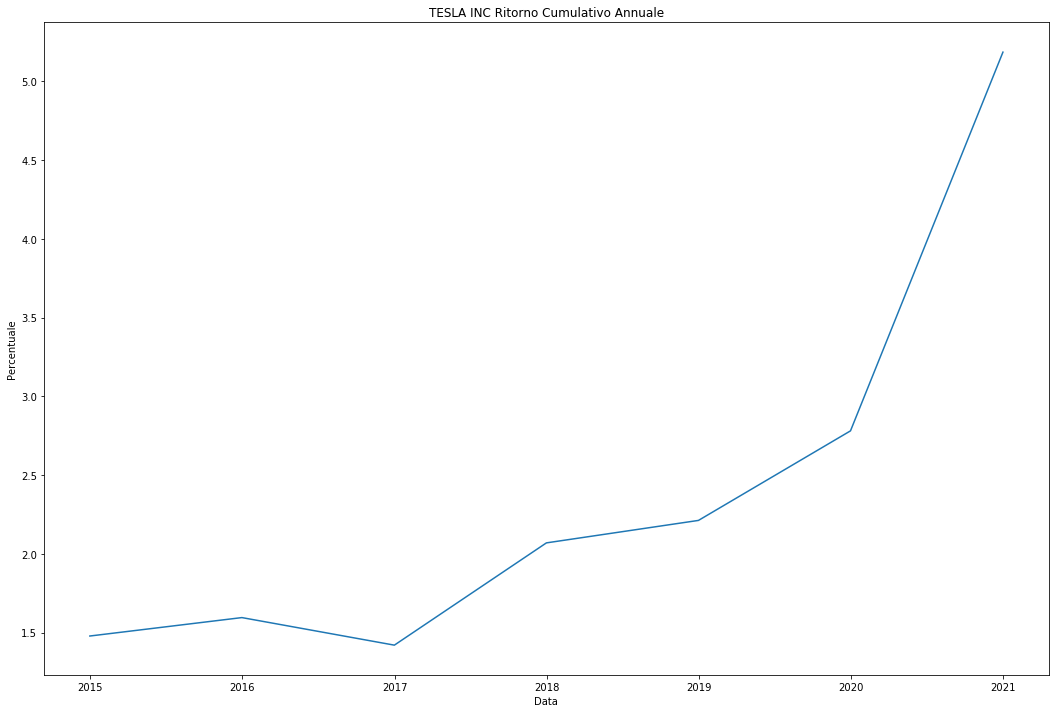

In [19]:
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(111)
ax1.plot((ritorno_annuale + 1).cumprod())
ax1.set_xlabel("Data")
ax1.set_ylabel("Percentuale")
ax1.set_title("{} Ritorno Cumulativo Annuale".format(nome))
plt.show()